In [16]:
import pandas as pd
import csv
import os

In [17]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']

scalogram = ['up_bytes_1max_y', 'up_bytes_2max_y', 'up_bytes_3max_y', 'up_bytes_4max_y', 'up_bytes_5max_y',
    'up_bytes_1max_x', 'up_bytes_2max_x', 'up_bytes_3max_x', 'up_bytes_4max_x', 'up_bytes_5max_x',
    'up_bytes_1min_y', 'up_bytes_2min_y', 'up_bytes_3min_y', 'up_bytes_4min_y', 'up_bytes_5min_y',
    'up_bytes_1min_x', 'up_bytes_2min_x', 'up_bytes_3min_x', 'up_bytes_4min_x', 'up_bytes_5min_x',
    'up_packet_1max_y', 'up_packet_2max_y', 'up_packet_3max_y', 'up_packet_4max_y', 'up_packet_5max_y',
    'up_packet_1max_x', 'up_packet_2max_x', 'up_packet_3max_x', 'up_packet_4max_x', 'up_packet_5max_x',
    'up_packet_1min_y', 'up_packet_2min_y', 'up_packet_2min_y', 'up_packet_4min_y', 'up_packet_5min_y',
    'up_packet_1min_x', 'up_packet_2min_x', 'up_packet_3min_x', 'up_packet_4min_x', 'up_packet_5min_x',
    'down_bytes_1max_y', 'down_bytes_2max_y', 'down_bytes_3max_y', 'down_bytes_4max_y', 'down_bytes_5max_y',
    'down_bytes_1max_x', 'down_bytes_2max_x', 'down_bytes_3max_x', 'down_bytes_4max_x', 'down_bytes_5max_x',
    'down_bytes_1min_y', 'down_bytes_2min_y', 'down_bytes_3min_y', 'down_bytes_4min_y', 'down_bytes_5min_y',
    'down_bytes_1min_x', 'down_bytes_2min_x', 'down_bytes_3min_x', 'down_bytes_4min_x', 'down_bytes_5min_x',
    'down_packet_1max_y', 'down_packet_2max_y', 'down_packet_3max_y', 'down_packet_4max_y', 'down_packet_5max_y',
    'down_packet_1max_x', 'down_packet_2max_x', 'down_packet_3max_x', 'down_packet_4max_x', 'down_packet_5max_x',
    'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_2min_y', 'down_packet_4min_y', 'down_packet_5min_y',
    'down_packet_1min_x', 'down_packet_2min_x', 'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x']

In [3]:
base_folder = "csv/30s1s/"

dataset = pd.DataFrame()

for path, subdirs, files in os.walk(base_folder):
    for name in files:
        #if(os.path.basename(path) != 'twitch'):
        #    continue
        #print(os.path.join(str(path), str(name)))
        data = pd.read_csv(os.path.join(str(path), str(name)))
        dataset = pd.concat([dataset, data])
dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence', 
                      'up_packet_2min_y.1', 'down_packet_2min_y.1' ], inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90',
       ...
       'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_4min_y',
       'down_packet_5min_y', 'down_packet_1min_x', 'down_packet_2min_x',
       'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x',
       'label'],
      dtype='object', length=127)
127


In [4]:
#Test some stuff
#dataset.drop(columns=scalogram, inplace=True)
features = dataset.columns[:-1]

In [5]:
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
labels

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
588    2
589    2
590    2
591    2
592    2
593    2
594    2
595    2
596    2
597    2
598    2
599    2
600    2
601    2
602    2
603    2
604    2
605    2
606    2
607    2
608    2
609    2
610    2
611    2
612    2
613    2
614    2
615    2
616    2
617    2
Name: label, Length: 618, dtype: int64

In [6]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
up_packet_median               0.524230
up_packet_perc50               0.524230
down_packet_perc50             0.518817
down_packet_median             0.518817
down_bytes_perc50              0.452774
down_bytes_median              0.452774
up_bytes_perc25                0.416768
up_bytes_median                0.379725
up_bytes_perc50                0.379725
up_packet_perc25               0.337115
down_packet_perc25             0.316979
up_packet_perc75               0.282549
up_packet_mean                 0.274724
down_bytes_4min_x              0.269236
down_bytes_4max_y              0.266440
up_packet_3max_y               0.265131
down_bytes_4min_y              0.264986
down_bytes_perc25              0.264933
down_packet_3max_y             0.264234
down_bytes_4max_x              0.263168
down_packet_mean               0.255446
up_packet_1max_y               0.253824
down_packet_perc75             0.252048
up_packet_4min_x               0.244668


In [7]:
# Imputer for NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

In [8]:
from sklearn.preprocessing import normalize, MinMaxScaler
# Normalize data
dataset_no_label = dataset.loc[:, dataset.columns != 'label']

dataset = (dataset_no_label - dataset_no_label.mean()) / (dataset_no_label.max() - dataset_no_label.min())

#dataset_normalized = normalize(dataset_no_label)
#dataset = (dataset_no_label - dataset_no_label.mean())
#dataset = pd.DataFrame(dataset_normalized, columns=features)


#min_max_scaler = MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(dataset_no_label)
#dataset = pd.DataFrame(x_scaled, columns=features)

#dataset=(dataset_no_label-dataset_no_label.mean())/dataset_no_label.std()


In [9]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
main_components = pca.fit_transform(dataset)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels

In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])


In [25]:
y_train_youtube = (y_train == 0)
y_train_netflix = (y_train == 1)
y_train_twitch = (y_train == 2)


In [26]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

def do_test_forest(model):
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [28]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
       
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------


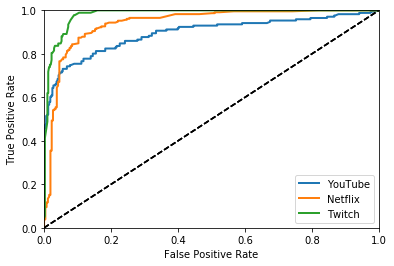

YouTube: 
	CrossValScore: 0.8681976790716286
	RocAucScore:  0.8945467383629352
Netflix: 
	CrossValScore: 0.8803217286914766
	RocAucScore:  0.941130479153293
Twitch: 
	CrossValScore: 0.9412164865946379
	RocAucScore:  0.9814784771793208
Multiclass: 
	CrossValScore: 0.8380439560439561
[[38  6  1]
 [ 5 47  0]
 [ 2  2 23]]

Accuracy train set: 0.9939271255060729
Accuracy test set: 0.8709677419354839
----------SVM-----------


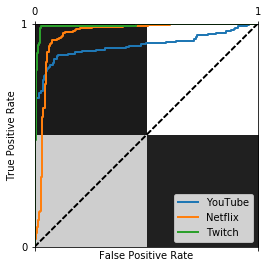

YouTube: 
	CrossValScore: 0.8885634253701482
	RocAucScore:  0.9018702587221408
Netflix: 
	CrossValScore: 0.9190140056022408
	RocAucScore:  0.9499777788751173
Twitch: 
	CrossValScore: 0.9676670668267308
	RocAucScore:  0.9887789314298076
Multiclass: 
	CrossValScore: 0.8948697017268445
[[41  3  1]
 [ 2 50  0]
 [ 0  0 27]]

Accuracy train set: 0.9271255060728745
Accuracy test set: 0.9516129032258065


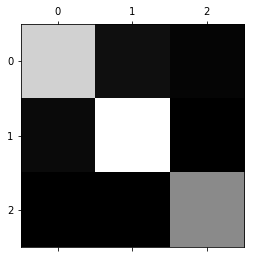

In [29]:
from sklearn.svm import SVC

print("-----Random Forest------")
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)
do_test_forest(rf)
print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)